In [1]:
import numpy as np
import csv
from helpers import*
from build_polynomial import*
from utils_predictions_manipulation import*
from utils_nans_manipulation import*
from cross_validation import*

# Model testing on training data

## Loading and cleaning data

### Loading training data

In [2]:
dtypes = "i8,S5,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,f8,i8,f8,f8,f8,f8,f8,f8,f8"
with open('Data/train.csv', 'r') as f:
    reader = csv.reader(f, delimiter=',')
    headerstrain = next(reader)
datatrain = np.genfromtxt('Data/train.csv', delimiter=",",names=True, dtype=dtypes)

### Format training data, add fake feature

In [3]:
# Building y
Y_total = np.array((datatrain['Prediction']==b's').astype(int))

# Filtering out useless data from x
names = list(datatrain.dtype.names)[2:]
datatrain_filtered = datatrain[names]

# Building x
x = np.empty((len(datatrain_filtered),len(datatrain_filtered[0].item())))
for i in range(len(datatrain_filtered)):
    x[i] = np.array(datatrain_filtered[i].item()).reshape(1,-1)
    
# Adding 1s at the beginning
X_total = np.c_[np.ones(len(x)),x]

### Separating data points with and without NaNs

In [4]:
# Replacing undefined data with NaNs

X_nans = replace_bad_data_with_nans(X_total, -999)

In [5]:
# Splitting the dataset based on presence of NaNs

X_no_nans, Y_no_nans = delete_nan_points(X_nans, Y_total)
X_with_nans, Y_with_nans = store_nan_points(X_nans, Y_total)

In [6]:
# Replacing NaNs with median

X_cleaned = replace_nans_with_median(X_with_nans, threshold=0.5)
Y_cleaned = Y_with_nans  # As we do not delete any data point, Y is the same for the cleaned data

### Cleaned Data names in the cell below!

In [8]:
print(X_no_nans.shape, Y_no_nans.shape)
print(X_cleaned.shape, Y_cleaned.shape)

(68114, 31) (68114,)
(181886, 21) (181886,)


# LPM

## Gradient Descent

In [23]:
meanacc_dtest_gd = []
meanacc_dtrain_gd = []

from time import time

start = time()
# Execute for data originally with no NaNs
dtmp_tr,dtmp_te=cross_validation(Y_no_nans,X_no_nans,k_fold=4,seed=1, function_name='gd', gamma=0.000002, max_iters=1000)
meanacc_dtest_gd.append(dtmp_te)
meanacc_dtrain_gd.append(dtmp_tr)

# Execute for data originally with NaNs
dtmp_tr,dtmp_te=cross_validation(Y_cleaned,X_cleaned,k_fold=4,seed=1, function_name='gd', gamma=0.000002, max_iters=1000)
meanacc_dtest_gd.append(dtmp_te)
meanacc_dtrain_gd.append(dtmp_tr)
end = time()

print(end - start)

Gradient Descent(0/999): loss=0.2344471850285804
Gradient Descent(1/999): loss=0.12572120799910913
Gradient Descent(2/999): loss=0.1246789471861695
Gradient Descent(3/999): loss=0.12434172030491897
Gradient Descent(4/999): loss=0.1240301876036757
Gradient Descent(5/999): loss=0.12373514673728662
Gradient Descent(6/999): loss=0.12345326030185856
Gradient Descent(7/999): loss=0.1231823034183267
Gradient Descent(8/999): loss=0.12292075770498662
Gradient Descent(9/999): loss=0.12266756497252462
Gradient Descent(10/999): loss=0.12242196769899616
Gradient Descent(11/999): loss=0.12218340561150044
Gradient Descent(12/999): loss=0.12195144861125863
Gradient Descent(13/999): loss=0.12172575324182368
Gradient Descent(14/999): loss=0.12150603440949644
Gradient Descent(15/999): loss=0.12129204698575002
Gradient Descent(16/999): loss=0.1210835738132422
Gradient Descent(17/999): loss=0.12088041786231343
Gradient Descent(18/999): loss=0.12068239707851944
Gradient Descent(19/999): loss=0.1204893409758

Gradient Descent(180/999): loss=0.11101259498711236
Gradient Descent(181/999): loss=0.11099490707279779
Gradient Descent(182/999): loss=0.11097736268295005
Gradient Descent(183/999): loss=0.11095995987147483
Gradient Descent(184/999): loss=0.11094269672668763
Gradient Descent(185/999): loss=0.11092557137056024
Gradient Descent(186/999): loss=0.11090858195798721
Gradient Descent(187/999): loss=0.11089172667607208
Gradient Descent(188/999): loss=0.11087500374343248
Gradient Descent(189/999): loss=0.11085841140952336
Gradient Descent(190/999): loss=0.11084194795397799
Gradient Descent(191/999): loss=0.11082561168596654
Gradient Descent(192/999): loss=0.11080940094357089
Gradient Descent(193/999): loss=0.11079331409317568
Gradient Descent(194/999): loss=0.11077734952887539
Gradient Descent(195/999): loss=0.11076150567189623
Gradient Descent(196/999): loss=0.11074578097003285
Gradient Descent(197/999): loss=0.1107301738970996
Gradient Descent(198/999): loss=0.11071468295239535
Gradient Desc

Gradient Descent(364/999): loss=0.10907786820745072
Gradient Descent(365/999): loss=0.10907130390368627
Gradient Descent(366/999): loss=0.10906476322208969
Gradient Descent(367/999): loss=0.1090582460042829
Gradient Descent(368/999): loss=0.10905175209355279
Gradient Descent(369/999): loss=0.109045281334829
Gradient Descent(370/999): loss=0.10903883357466218
Gradient Descent(371/999): loss=0.10903240866120231
Gradient Descent(372/999): loss=0.1090260064441774
Gradient Descent(373/999): loss=0.10901962677487283
Gradient Descent(374/999): loss=0.10901326950611039
Gradient Descent(375/999): loss=0.1090069344922283
Gradient Descent(376/999): loss=0.1090006215890609
Gradient Descent(377/999): loss=0.10899433065391922
Gradient Descent(378/999): loss=0.10898806154557139
Gradient Descent(379/999): loss=0.10898181412422354
Gradient Descent(380/999): loss=0.10897558825150098
Gradient Descent(381/999): loss=0.10896938379042968
Gradient Descent(382/999): loss=0.10896320060541785
Gradient Descent(3

Gradient Descent(558/999): loss=0.108119589672934
Gradient Descent(559/999): loss=0.10811584064252516
Gradient Descent(560/999): loss=0.10811210062384388
Gradient Descent(561/999): loss=0.10810836958266003
Gradient Descent(562/999): loss=0.10810464748493806
Gradient Descent(563/999): loss=0.10810093429683519
Gradient Descent(564/999): loss=0.10809722998469984
Gradient Descent(565/999): loss=0.1080935345150701
Gradient Descent(566/999): loss=0.10808984785467202
Gradient Descent(567/999): loss=0.10808616997041808
Gradient Descent(568/999): loss=0.10808250082940567
Gradient Descent(569/999): loss=0.1080788403989155
Gradient Descent(570/999): loss=0.10807518864641007
Gradient Descent(571/999): loss=0.1080715455395322
Gradient Descent(572/999): loss=0.10806791104610358
Gradient Descent(573/999): loss=0.10806428513412314
Gradient Descent(574/999): loss=0.10806066777176579
Gradient Descent(575/999): loss=0.10805705892738088
Gradient Descent(576/999): loss=0.10805345856949075
Gradient Descent(

Gradient Descent(752/999): loss=0.1075284592174605
Gradient Descent(753/999): loss=0.10752598488227612
Gradient Descent(754/999): loss=0.10752351528769138
Gradient Descent(755/999): loss=0.10752105041975173
Gradient Descent(756/999): loss=0.10751859026455689
Gradient Descent(757/999): loss=0.10751613480826082
Gradient Descent(758/999): loss=0.10751368403707122
Gradient Descent(759/999): loss=0.1075112379372493
Gradient Descent(760/999): loss=0.10750879649510957
Gradient Descent(761/999): loss=0.10750635969701954
Gradient Descent(762/999): loss=0.10750392752939941
Gradient Descent(763/999): loss=0.10750149997872191
Gradient Descent(764/999): loss=0.10749907703151189
Gradient Descent(765/999): loss=0.10749665867434614
Gradient Descent(766/999): loss=0.10749424489385316
Gradient Descent(767/999): loss=0.10749183567671285
Gradient Descent(768/999): loss=0.10748943100965622
Gradient Descent(769/999): loss=0.1074870308794652
Gradient Descent(770/999): loss=0.10748463527297243
Gradient Descen

Gradient Descent(945/999): loss=0.10712484597695777
Gradient Descent(946/999): loss=0.1071230797669036
Gradient Descent(947/999): loss=0.10712131636403957
Gradient Descent(948/999): loss=0.10711955576133594
Gradient Descent(949/999): loss=0.10711779795178601
Gradient Descent(950/999): loss=0.10711604292840593
Gradient Descent(951/999): loss=0.10711429068423467
Gradient Descent(952/999): loss=0.10711254121233388
Gradient Descent(953/999): loss=0.10711079450578793
Gradient Descent(954/999): loss=0.10710905055770364
Gradient Descent(955/999): loss=0.10710730936121028
Gradient Descent(956/999): loss=0.10710557090945948
Gradient Descent(957/999): loss=0.10710383519562515
Gradient Descent(958/999): loss=0.10710210221290337
Gradient Descent(959/999): loss=0.1071003719545123
Gradient Descent(960/999): loss=0.10709864441369212
Gradient Descent(961/999): loss=0.10709691958370497
Gradient Descent(962/999): loss=0.10709519745783473
Gradient Descent(963/999): loss=0.10709347802938705
Gradient Desce

Gradient Descent(116/999): loss=0.11234123837313603
Gradient Descent(117/999): loss=0.11230710851650244
Gradient Descent(118/999): loss=0.11227338242441638
Gradient Descent(119/999): loss=0.1122400526246067
Gradient Descent(120/999): loss=0.11220711182606401
Gradient Descent(121/999): loss=0.11217455291372025
Gradient Descent(122/999): loss=0.11214236894330429
Gradient Descent(123/999): loss=0.11211055313636642
Gradient Descent(124/999): loss=0.11207909887546666
Gradient Descent(125/999): loss=0.11204799969952056
Gradient Descent(126/999): loss=0.11201724929929728
Gradient Descent(127/999): loss=0.11198684151306464
Gradient Descent(128/999): loss=0.11195677032237587
Gradient Descent(129/999): loss=0.11192702984799334
Gradient Descent(130/999): loss=0.11189761434594407
Gradient Descent(131/999): loss=0.1118685182037032
Gradient Descent(132/999): loss=0.11183973593649998
Gradient Descent(133/999): loss=0.11181126218374311
Gradient Descent(134/999): loss=0.11178309170556022
Gradient Desce

Gradient Descent(305/999): loss=0.10920067382124397
Gradient Descent(306/999): loss=0.10919211620037858
Gradient Descent(307/999): loss=0.10918359685363185
Gradient Descent(308/999): loss=0.109175115459988
Gradient Descent(309/999): loss=0.10916667170232218
Gradient Descent(310/999): loss=0.10915826526734415
Gradient Descent(311/999): loss=0.10914989584554267
Gradient Descent(312/999): loss=0.10914156313113083
Gradient Descent(313/999): loss=0.10913326682199215
Gradient Descent(314/999): loss=0.10912500661962796
Gradient Descent(315/999): loss=0.10911678222910491
Gradient Descent(316/999): loss=0.10910859335900419
Gradient Descent(317/999): loss=0.10910043972137079
Gradient Descent(318/999): loss=0.10909232103166414
Gradient Descent(319/999): loss=0.10908423700870915
Gradient Descent(320/999): loss=0.10907618737464818
Gradient Descent(321/999): loss=0.10906817185489404
Gradient Descent(322/999): loss=0.10906019017808306
Gradient Descent(323/999): loss=0.10905224207602976
Gradient Desce

Gradient Descent(493/999): loss=0.10804129393179074
Gradient Descent(494/999): loss=0.10803677123294206
Gradient Descent(495/999): loss=0.10803226066015485
Gradient Descent(496/999): loss=0.10802776215950827
Gradient Descent(497/999): loss=0.10802327567745625
Gradient Descent(498/999): loss=0.10801880116082346
Gradient Descent(499/999): loss=0.10801433855680181
Gradient Descent(500/999): loss=0.10800988781294656
Gradient Descent(501/999): loss=0.10800544887717277
Gradient Descent(502/999): loss=0.1080010216977518
Gradient Descent(503/999): loss=0.1079966062233076
Gradient Descent(504/999): loss=0.1079922024028133
Gradient Descent(505/999): loss=0.10798781018558777
Gradient Descent(506/999): loss=0.10798342952129215
Gradient Descent(507/999): loss=0.1079790603599265
Gradient Descent(508/999): loss=0.1079747026518265
Gradient Descent(509/999): loss=0.10797035634766011
Gradient Descent(510/999): loss=0.10796602139842441
Gradient Descent(511/999): loss=0.10796169775544225
Gradient Descent(

Gradient Descent(689/999): loss=0.10733612845048172
Gradient Descent(690/999): loss=0.10733326441406835
Gradient Descent(691/999): loss=0.107330406240822
Gradient Descent(692/999): loss=0.10732755391206843
Gradient Descent(693/999): loss=0.10732470740921436
Gradient Descent(694/999): loss=0.10732186671374676
Gradient Descent(695/999): loss=0.10731903180723258
Gradient Descent(696/999): loss=0.10731620267131817
Gradient Descent(697/999): loss=0.10731337928772887
Gradient Descent(698/999): loss=0.10731056163826849
Gradient Descent(699/999): loss=0.10730774970481896
Gradient Descent(700/999): loss=0.1073049434693397
Gradient Descent(701/999): loss=0.10730214291386739
Gradient Descent(702/999): loss=0.10729934802051525
Gradient Descent(703/999): loss=0.10729655877147287
Gradient Descent(704/999): loss=0.1072937751490056
Gradient Descent(705/999): loss=0.10729099713545419
Gradient Descent(706/999): loss=0.10728822471323428
Gradient Descent(707/999): loss=0.10728545786483604
Gradient Descent

Gradient Descent(874/999): loss=0.10688984544710357
Gradient Descent(875/999): loss=0.10688781471490579
Gradient Descent(876/999): loss=0.10688578740459803
Gradient Descent(877/999): loss=0.10688376350705386
Gradient Descent(878/999): loss=0.10688174301317865
Gradient Descent(879/999): loss=0.10687972591390978
Gradient Descent(880/999): loss=0.10687771220021638
Gradient Descent(881/999): loss=0.10687570186309918
Gradient Descent(882/999): loss=0.1068736948935903
Gradient Descent(883/999): loss=0.10687169128275334
Gradient Descent(884/999): loss=0.10686969102168299
Gradient Descent(885/999): loss=0.10686769410150501
Gradient Descent(886/999): loss=0.1068657005133762
Gradient Descent(887/999): loss=0.10686371024848401
Gradient Descent(888/999): loss=0.10686172329804668
Gradient Descent(889/999): loss=0.10685973965331291
Gradient Descent(890/999): loss=0.10685775930556185
Gradient Descent(891/999): loss=0.10685578224610291
Gradient Descent(892/999): loss=0.1068538084662756
Gradient Descen

Gradient Descent(41/999): loss=0.11699414199566352
Gradient Descent(42/999): loss=0.11687866750649824
Gradient Descent(43/999): loss=0.11676559755932733
Gradient Descent(44/999): loss=0.11665486485326451
Gradient Descent(45/999): loss=0.11654640426614787
Gradient Descent(46/999): loss=0.11644015277869521
Gradient Descent(47/999): loss=0.11633604940139615
Gradient Descent(48/999): loss=0.11623403510403803
Gradient Descent(49/999): loss=0.11613405274776889
Gradient Descent(50/999): loss=0.11603604701960327
Gradient Descent(51/999): loss=0.11593996436928092
Gradient Descent(52/999): loss=0.11584575294839254
Gradient Descent(53/999): loss=0.11575336255168993
Gradient Descent(54/999): loss=0.11566274456049924
Gradient Descent(55/999): loss=0.11557385188816222
Gradient Descent(56/999): loss=0.11548663892743048
Gradient Descent(57/999): loss=0.11540106149974154
Gradient Descent(58/999): loss=0.11531707680630866
Gradient Descent(59/999): loss=0.11523464338095757
Gradient Descent(60/999): loss=

Gradient Descent(243/999): loss=0.10968923009452268
Gradient Descent(244/999): loss=0.10967764104016285
Gradient Descent(245/999): loss=0.10966612101514299
Gradient Descent(246/999): loss=0.10965466927314456
Gradient Descent(247/999): loss=0.1096432850785558
Gradient Descent(248/999): loss=0.10963196770629159
Gradient Descent(249/999): loss=0.10962071644161696
Gradient Descent(250/999): loss=0.10960953057997383
Gradient Descent(251/999): loss=0.10959840942681136
Gradient Descent(252/999): loss=0.10958735229741932
Gradient Descent(253/999): loss=0.10957635851676509
Gradient Descent(254/999): loss=0.1095654274193333
Gradient Descent(255/999): loss=0.1095545583489689
Gradient Descent(256/999): loss=0.10954375065872334
Gradient Descent(257/999): loss=0.10953300371070304
Gradient Descent(258/999): loss=0.10952231687592162
Gradient Descent(259/999): loss=0.10951168953415415
Gradient Descent(260/999): loss=0.10950112107379464
Gradient Descent(261/999): loss=0.10949061089171602
Gradient Descen

Gradient Descent(422/999): loss=0.10828952405085757
Gradient Descent(423/999): loss=0.10828406996097487
Gradient Descent(424/999): loss=0.10827863261399104
Gradient Descent(425/999): loss=0.10827321191768188
Gradient Descent(426/999): loss=0.10826780778064655
Gradient Descent(427/999): loss=0.10826242011229747
Gradient Descent(428/999): loss=0.10825704882285052
Gradient Descent(429/999): loss=0.10825169382331526
Gradient Descent(430/999): loss=0.10824635502548535
Gradient Descent(431/999): loss=0.10824103234192914
Gradient Descent(432/999): loss=0.10823572568598022
Gradient Descent(433/999): loss=0.10823043497172838
Gradient Descent(434/999): loss=0.10822516011401036
Gradient Descent(435/999): loss=0.10821990102840102
Gradient Descent(436/999): loss=0.10821465763120461
Gradient Descent(437/999): loss=0.10820942983944587
Gradient Descent(438/999): loss=0.10820421757086161
Gradient Descent(439/999): loss=0.10819902074389216
Gradient Descent(440/999): loss=0.1081938392776732
Gradient Desc

Gradient Descent(606/999): loss=0.10750007484420772
Gradient Descent(607/999): loss=0.10749668691199184
Gradient Descent(608/999): loss=0.10749330653183012
Gradient Descent(609/999): loss=0.10748993367709415
Gradient Descent(610/999): loss=0.10748656832129035
Gradient Descent(611/999): loss=0.10748321043805903
Gradient Descent(612/999): loss=0.10747986000117338
Gradient Descent(613/999): loss=0.10747651698453851
Gradient Descent(614/999): loss=0.10747318136219038
Gradient Descent(615/999): loss=0.10746985310829497
Gradient Descent(616/999): loss=0.10746653219714734
Gradient Descent(617/999): loss=0.10746321860317042
Gradient Descent(618/999): loss=0.10745991230091446
Gradient Descent(619/999): loss=0.10745661326505586
Gradient Descent(620/999): loss=0.10745332147039635
Gradient Descent(621/999): loss=0.1074500368918619
Gradient Descent(622/999): loss=0.10744675950450226
Gradient Descent(623/999): loss=0.10744348928348953
Gradient Descent(624/999): loss=0.10744022620411768
Gradient Desc

Gradient Descent(933/999): loss=0.10668441287092419
Gradient Descent(934/999): loss=0.1066825706315096
Gradient Descent(935/999): loss=0.10668073126966113
Gradient Descent(936/999): loss=0.10667889477810705
Gradient Descent(937/999): loss=0.10667706114959997
Gradient Descent(938/999): loss=0.10667523037691665
Gradient Descent(939/999): loss=0.10667340245285774
Gradient Descent(940/999): loss=0.10667157737024795
Gradient Descent(941/999): loss=0.10666975512193581
Gradient Descent(942/999): loss=0.10666793570079355
Gradient Descent(943/999): loss=0.1066661190997171
Gradient Descent(944/999): loss=0.1066643053116259
Gradient Descent(945/999): loss=0.10666249432946286
Gradient Descent(946/999): loss=0.10666068614619426
Gradient Descent(947/999): loss=0.10665888075480962
Gradient Descent(948/999): loss=0.10665707814832168
Gradient Descent(949/999): loss=0.10665527831976628
Gradient Descent(950/999): loss=0.10665348126220213
Gradient Descent(951/999): loss=0.10665168696871101
Gradient Descen

Gradient Descent(96/999): loss=0.11311742687907307
Gradient Descent(97/999): loss=0.11307241460488007
Gradient Descent(98/999): loss=0.11302801592822609
Gradient Descent(99/999): loss=0.11298421804847629
Gradient Descent(100/999): loss=0.11294100850693804
Gradient Descent(101/999): loss=0.11289837517619984
Gradient Descent(102/999): loss=0.11285630624983173
Gradient Descent(103/999): loss=0.11281479023243508
Gradient Descent(104/999): loss=0.11277381593002851
Gradient Descent(105/999): loss=0.11273337244075927
Gradient Descent(106/999): loss=0.11269344914592731
Gradient Descent(107/999): loss=0.11265403570131208
Gradient Descent(108/999): loss=0.11261512202879062
Gradient Descent(109/999): loss=0.11257669830823723
Gradient Descent(110/999): loss=0.11253875496969457
Gradient Descent(111/999): loss=0.11250128268580657
Gradient Descent(112/999): loss=0.11246427236450408
Gradient Descent(113/999): loss=0.1124277151419346
Gradient Descent(114/999): loss=0.11239160237562697
Gradient Descent(

Gradient Descent(288/999): loss=0.10926792545369501
Gradient Descent(289/999): loss=0.1092584452898348
Gradient Descent(290/999): loss=0.10924901031621019
Gradient Descent(291/999): loss=0.10923962012858243
Gradient Descent(292/999): loss=0.10923027432781851
Gradient Descent(293/999): loss=0.10922097251981475
Gradient Descent(294/999): loss=0.10921171431542157
Gradient Descent(295/999): loss=0.10920249933036962
Gradient Descent(296/999): loss=0.10919332718519707
Gradient Descent(297/999): loss=0.10918419750517815
Gradient Descent(298/999): loss=0.1091751099202529
Gradient Descent(299/999): loss=0.10916606406495816
Gradient Descent(300/999): loss=0.10915705957835958
Gradient Descent(301/999): loss=0.10914809610398488
Gradient Descent(302/999): loss=0.10913917328975814
Gradient Descent(303/999): loss=0.10913029078793511
Gradient Descent(304/999): loss=0.10912144825504
Gradient Descent(305/999): loss=0.10911264535180254
Gradient Descent(306/999): loss=0.109103881743097
Gradient Descent(30

Gradient Descent(463/999): loss=0.10806830481774762
Gradient Descent(464/999): loss=0.10806325063906995
Gradient Descent(465/999): loss=0.10805821065823751
Gradient Descent(466/999): loss=0.10805318480705123
Gradient Descent(467/999): loss=0.10804817301783536
Gradient Descent(468/999): loss=0.10804317522343208
Gradient Descent(469/999): loss=0.10803819135719558
Gradient Descent(470/999): loss=0.10803322135298675
Gradient Descent(471/999): loss=0.10802826514516749
Gradient Descent(472/999): loss=0.10802332266859543
Gradient Descent(473/999): loss=0.10801839385861862
Gradient Descent(474/999): loss=0.1080134786510701
Gradient Descent(475/999): loss=0.10800857698226289
Gradient Descent(476/999): loss=0.10800368878898467
Gradient Descent(477/999): loss=0.10799881400849297
Gradient Descent(478/999): loss=0.10799395257850991
Gradient Descent(479/999): loss=0.10798910443721738
Gradient Descent(480/999): loss=0.10798426952325221
Gradient Descent(481/999): loss=0.1079794477757013
Gradient Desce

Gradient Descent(654/999): loss=0.10730264727466689
Gradient Descent(655/999): loss=0.1072994626316937
Gradient Descent(656/999): loss=0.10729628471530953
Gradient Descent(657/999): loss=0.10729311350335752
Gradient Descent(658/999): loss=0.1072899489737822
Gradient Descent(659/999): loss=0.10728679110462896
Gradient Descent(660/999): loss=0.10728363987404341
Gradient Descent(661/999): loss=0.10728049526027067
Gradient Descent(662/999): loss=0.10727735724165482
Gradient Descent(663/999): loss=0.10727422579663819
Gradient Descent(664/999): loss=0.10727110090376075
Gradient Descent(665/999): loss=0.1072679825416595
Gradient Descent(666/999): loss=0.10726487068906791
Gradient Descent(667/999): loss=0.10726176532481517
Gradient Descent(668/999): loss=0.10725866642782565
Gradient Descent(669/999): loss=0.10725557397711842
Gradient Descent(670/999): loss=0.10725248795180652
Gradient Descent(671/999): loss=0.10724940833109628
Gradient Descent(672/999): loss=0.10724633509428705
Gradient Descen

Gradient Descent(841/999): loss=0.10680441220324596
Gradient Descent(842/999): loss=0.10680218452310423
Gradient Descent(843/999): loss=0.10679996069304323
Gradient Descent(844/999): loss=0.10679774070259625
Gradient Descent(845/999): loss=0.10679552454133401
Gradient Descent(846/999): loss=0.10679331219886459
Gradient Descent(847/999): loss=0.10679110366483321
Gradient Descent(848/999): loss=0.10678889892892211
Gradient Descent(849/999): loss=0.10678669798085026
Gradient Descent(850/999): loss=0.10678450081037344
Gradient Descent(851/999): loss=0.10678230740728381
Gradient Descent(852/999): loss=0.10678011776140994
Gradient Descent(853/999): loss=0.10677793186261647
Gradient Descent(854/999): loss=0.10677574970080415
Gradient Descent(855/999): loss=0.10677357126590956
Gradient Descent(856/999): loss=0.10677139654790489
Gradient Descent(857/999): loss=0.106769225536798
Gradient Descent(858/999): loss=0.10676705822263208
Gradient Descent(859/999): loss=0.10676489459548547
Gradient Desce

Gradient Descent(1/999): loss=0.13520156577666093
Gradient Descent(2/999): loss=0.12617133474016917
Gradient Descent(3/999): loss=0.11980817246015243
Gradient Descent(4/999): loss=0.11531862134887258
Gradient Descent(5/999): loss=0.11214531233136474
Gradient Descent(6/999): loss=0.1098967179053675
Gradient Descent(7/999): loss=0.10829780682407136
Gradient Descent(8/999): loss=0.10715538122918253
Gradient Descent(9/999): loss=0.10633372754522481
Gradient Descent(10/999): loss=0.1057375123274167
Gradient Descent(11/999): loss=0.10529976736371024
Gradient Descent(12/999): loss=0.10497344974907173
Gradient Descent(13/999): loss=0.10472551321703684
Gradient Descent(14/999): loss=0.1045327435165986
Gradient Descent(15/999): loss=0.10437883295163332
Gradient Descent(16/999): loss=0.10425232537629948
Gradient Descent(17/999): loss=0.10414517264662367
Gradient Descent(18/999): loss=0.10405172059256956
Gradient Descent(19/999): loss=0.10396799670893586
Gradient Descent(20/999): loss=0.1038912097

Gradient Descent(161/999): loss=0.09786577136020087
Gradient Descent(162/999): loss=0.097837168728843
Gradient Descent(163/999): loss=0.09780870784586355
Gradient Descent(164/999): loss=0.0977803878421866
Gradient Descent(165/999): loss=0.09775220785440324
Gradient Descent(166/999): loss=0.09772416702473274
Gradient Descent(167/999): loss=0.09769626450098372
Gradient Descent(168/999): loss=0.09766849943651582
Gradient Descent(169/999): loss=0.09764087099020147
Gradient Descent(170/999): loss=0.09761337832638811
Gradient Descent(171/999): loss=0.09758602061486085
Gradient Descent(172/999): loss=0.09755879703080499
Gradient Descent(173/999): loss=0.09753170675476928
Gradient Descent(174/999): loss=0.09750474897262926
Gradient Descent(175/999): loss=0.09747792287555077
Gradient Descent(176/999): loss=0.09745122765995425
Gradient Descent(177/999): loss=0.09742466252747842
Gradient Descent(178/999): loss=0.09739822668494526
Gradient Descent(179/999): loss=0.09737191934432464
Gradient Descen

Gradient Descent(324/999): loss=0.09459068468638406
Gradient Descent(325/999): loss=0.09457684218114926
Gradient Descent(326/999): loss=0.09456305356385594
Gradient Descent(327/999): loss=0.09454931852949741
Gradient Descent(328/999): loss=0.09453563677499276
Gradient Descent(329/999): loss=0.09452200799917466
Gradient Descent(330/999): loss=0.09450843190277686
Gradient Descent(331/999): loss=0.09449490818842182
Gradient Descent(332/999): loss=0.09448143656060858
Gradient Descent(333/999): loss=0.09446801672570054
Gradient Descent(334/999): loss=0.09445464839191338
Gradient Descent(335/999): loss=0.09444133126930304
Gradient Descent(336/999): loss=0.09442806506975383
Gradient Descent(337/999): loss=0.09441484950696664
Gradient Descent(338/999): loss=0.09440168429644705
Gradient Descent(339/999): loss=0.09438856915549369
Gradient Descent(340/999): loss=0.09437550380318672
Gradient Descent(341/999): loss=0.09436248796037618
Gradient Descent(342/999): loss=0.09434952134967049
Gradient Des

Gradient Descent(639/999): loss=0.09186547151800131
Gradient Descent(640/999): loss=0.09185994300504886
Gradient Descent(641/999): loss=0.09185442607861216
Gradient Descent(642/999): loss=0.091848920693551
Gradient Descent(643/999): loss=0.09184342680497933
Gradient Descent(644/999): loss=0.09183794436826401
Gradient Descent(645/999): loss=0.09183247333902286
Gradient Descent(646/999): loss=0.09182701367312329
Gradient Descent(647/999): loss=0.09182156532668065
Gradient Descent(648/999): loss=0.0918161282560567
Gradient Descent(649/999): loss=0.09181070241785803
Gradient Descent(650/999): loss=0.09180528776893455
Gradient Descent(651/999): loss=0.09179988426637797
Gradient Descent(652/999): loss=0.0917944918675202
Gradient Descent(653/999): loss=0.09178911052993197
Gradient Descent(654/999): loss=0.09178374021142112
Gradient Descent(655/999): loss=0.0917783808700314
Gradient Descent(656/999): loss=0.09177303246404073
Gradient Descent(657/999): loss=0.09176769495195984
Gradient Descent(

Gradient Descent(809/999): loss=0.09106278137692264
Gradient Descent(810/999): loss=0.09105873465610484
Gradient Descent(811/999): loss=0.09105469449657204
Gradient Descent(812/999): loss=0.09105066087988312
Gradient Descent(813/999): loss=0.09104663378768557
Gradient Descent(814/999): loss=0.0910426132017149
Gradient Descent(815/999): loss=0.09103859910379428
Gradient Descent(816/999): loss=0.09103459147583357
Gradient Descent(817/999): loss=0.09103059029982935
Gradient Descent(818/999): loss=0.09102659555786402
Gradient Descent(819/999): loss=0.09102260723210535
Gradient Descent(820/999): loss=0.09101862530480613
Gradient Descent(821/999): loss=0.09101464975830344
Gradient Descent(822/999): loss=0.09101068057501825
Gradient Descent(823/999): loss=0.091006717737455
Gradient Descent(824/999): loss=0.09100276122820092
Gradient Descent(825/999): loss=0.09099881102992557
Gradient Descent(826/999): loss=0.09099486712538056
Gradient Descent(827/999): loss=0.09099092949739875
Gradient Descen

Gradient Descent(983/999): loss=0.0904441939397807
Gradient Descent(984/999): loss=0.09044107165346894
Gradient Descent(985/999): loss=0.09043795369433055
Gradient Descent(986/999): loss=0.09043484005357742
Gradient Descent(987/999): loss=0.09043173072245347
Gradient Descent(988/999): loss=0.09042862569223481
Gradient Descent(989/999): loss=0.09042552495422948
Gradient Descent(990/999): loss=0.09042242849977718
Gradient Descent(991/999): loss=0.0904193363202491
Gradient Descent(992/999): loss=0.09041624840704797
Gradient Descent(993/999): loss=0.09041316475160754
Gradient Descent(994/999): loss=0.09041008534539277
Gradient Descent(995/999): loss=0.09040701017989934
Gradient Descent(996/999): loss=0.09040393924665371
Gradient Descent(997/999): loss=0.0904008725372128
Gradient Descent(998/999): loss=0.09039781004316395
Gradient Descent(999/999): loss=0.09039475175612473
Gradient Descent(0/999): loss=0.1474419593440508
Gradient Descent(1/999): loss=0.1347117309955451
Gradient Descent(2/99

Gradient Descent(156/999): loss=0.09772009496377483
Gradient Descent(157/999): loss=0.0976904429597492
Gradient Descent(158/999): loss=0.09766093864369084
Gradient Descent(159/999): loss=0.09763158112060313
Gradient Descent(160/999): loss=0.09760236950124579
Gradient Descent(161/999): loss=0.09757330290209551
Gradient Descent(162/999): loss=0.09754438044530706
Gradient Descent(163/999): loss=0.09751560125867456
Gradient Descent(164/999): loss=0.09748696447559328
Gradient Descent(165/999): loss=0.09745846923502148
Gradient Descent(166/999): loss=0.09743011468144257
Gradient Descent(167/999): loss=0.09740189996482805
Gradient Descent(168/999): loss=0.09737382424060001
Gradient Descent(169/999): loss=0.09734588666959444
Gradient Descent(170/999): loss=0.0973180864180247
Gradient Descent(171/999): loss=0.09729042265744516
Gradient Descent(172/999): loss=0.09726289456471532
Gradient Descent(173/999): loss=0.09723550132196393
Gradient Descent(174/999): loss=0.09720824211655384
Gradient Desce

Gradient Descent(314/999): loss=0.09440826739564119
Gradient Descent(315/999): loss=0.09439377107845044
Gradient Descent(316/999): loss=0.09437933303128211
Gradient Descent(317/999): loss=0.09436495292516281
Gradient Descent(318/999): loss=0.09435063043316871
Gradient Descent(319/999): loss=0.0943363652304124
Gradient Descent(320/999): loss=0.09432215699402999
Gradient Descent(321/999): loss=0.09430800540316817
Gradient Descent(322/999): loss=0.09429391013897118
Gradient Descent(323/999): loss=0.09427987088456834
Gradient Descent(324/999): loss=0.09426588732506122
Gradient Descent(325/999): loss=0.09425195914751104
Gradient Descent(326/999): loss=0.09423808604092618
Gradient Descent(327/999): loss=0.09422426769624986
Gradient Descent(328/999): loss=0.09421050380634761
Gradient Descent(329/999): loss=0.09419679406599507
Gradient Descent(330/999): loss=0.0941831381718659
Gradient Descent(331/999): loss=0.09416953582251954
Gradient Descent(332/999): loss=0.09415598671838919
Gradient Desce

Gradient Descent(486/999): loss=0.09255675452272535
Gradient Descent(487/999): loss=0.092548774190708
Gradient Descent(488/999): loss=0.09254081720408076
Gradient Descent(489/999): loss=0.09253288344851432
Gradient Descent(490/999): loss=0.09252497281036448
Gradient Descent(491/999): loss=0.09251708517666794
Gradient Descent(492/999): loss=0.09250922043513789
Gradient Descent(493/999): loss=0.09250137847415989
Gradient Descent(494/999): loss=0.0924935591827874
Gradient Descent(495/999): loss=0.09248576245073774
Gradient Descent(496/999): loss=0.09247798816838793
Gradient Descent(497/999): loss=0.0924702362267703
Gradient Descent(498/999): loss=0.09246250651756859
Gradient Descent(499/999): loss=0.09245479893311377
Gradient Descent(500/999): loss=0.0924471133663799
Gradient Descent(501/999): loss=0.0924394497109801
Gradient Descent(502/999): loss=0.09243180786116258
Gradient Descent(503/999): loss=0.09242418771180652
Gradient Descent(504/999): loss=0.09241658915841823
Gradient Descent(5

Gradient Descent(658/999): loss=0.09145197403771937
Gradient Descent(659/999): loss=0.09144677410763866
Gradient Descent(660/999): loss=0.09144158512559077
Gradient Descent(661/999): loss=0.09143640704941483
Gradient Descent(662/999): loss=0.09143123983718268
Gradient Descent(663/999): loss=0.09142608344719745
Gradient Descent(664/999): loss=0.09142093783799217
Gradient Descent(665/999): loss=0.09141580296832823
Gradient Descent(666/999): loss=0.09141067879719414
Gradient Descent(667/999): loss=0.091405565283804
Gradient Descent(668/999): loss=0.09140046238759604
Gradient Descent(669/999): loss=0.0913953700682315
Gradient Descent(670/999): loss=0.09139028828559294
Gradient Descent(671/999): loss=0.09138521699978312
Gradient Descent(672/999): loss=0.0913801561711235
Gradient Descent(673/999): loss=0.09137510576015294
Gradient Descent(674/999): loss=0.0913700657276263
Gradient Descent(675/999): loss=0.09136503603451325
Gradient Descent(676/999): loss=0.09136001664199671
Gradient Descent(

Gradient Descent(831/999): loss=0.09068642118797285
Gradient Descent(832/999): loss=0.09068264290181764
Gradient Descent(833/999): loss=0.09067887078125113
Gradient Descent(834/999): loss=0.09067510480899495
Gradient Descent(835/999): loss=0.09067134496785188
Gradient Descent(836/999): loss=0.09066759124070542
Gradient Descent(837/999): loss=0.09066384361051955
Gradient Descent(838/999): loss=0.09066010206033792
Gradient Descent(839/999): loss=0.09065636657328362
Gradient Descent(840/999): loss=0.09065263713255851
Gradient Descent(841/999): loss=0.09064891372144303
Gradient Descent(842/999): loss=0.09064519632329543
Gradient Descent(843/999): loss=0.09064148492155151
Gradient Descent(844/999): loss=0.09063777949972411
Gradient Descent(845/999): loss=0.0906340800414027
Gradient Descent(846/999): loss=0.09063038653025282
Gradient Descent(847/999): loss=0.09062669895001574
Gradient Descent(848/999): loss=0.09062301728450793
Gradient Descent(849/999): loss=0.0906193415176207
Gradient Desce

Gradient Descent(0/999): loss=0.14738697924684596
Gradient Descent(1/999): loss=0.1346629104511156
Gradient Descent(2/999): loss=0.1257064250805438
Gradient Descent(3/999): loss=0.11939615502227299
Gradient Descent(4/999): loss=0.11494452468250674
Gradient Descent(5/999): loss=0.11179839227269665
Gradient Descent(6/999): loss=0.10956926681731245
Gradient Descent(7/999): loss=0.10798429719325478
Gradient Descent(8/999): loss=0.10685185007109234
Gradient Descent(9/999): loss=0.10603733413649513
Gradient Descent(10/999): loss=0.10544622062151542
Gradient Descent(11/999): loss=0.10501211804817087
Gradient Descent(12/999): loss=0.10468839671662615
Gradient Descent(13/999): loss=0.10444230629931313
Gradient Descent(14/999): loss=0.10425084442784954
Gradient Descent(15/999): loss=0.1040978550615452
Gradient Descent(16/999): loss=0.10397199057319773
Gradient Descent(17/999): loss=0.10386528045281493
Gradient Descent(18/999): loss=0.10377212605966744
Gradient Descent(19/999): loss=0.10368859460

Gradient Descent(169/999): loss=0.09731866552259769
Gradient Descent(170/999): loss=0.097290797635322
Gradient Descent(171/999): loss=0.0972630647529109
Gradient Descent(172/999): loss=0.09723546606372274
Gradient Descent(173/999): loss=0.09720800076130172
Gradient Descent(174/999): loss=0.09718066804434317
Gradient Descent(175/999): loss=0.09715346711665905
Gradient Descent(176/999): loss=0.09712639718714408
Gradient Descent(177/999): loss=0.09709945746974154
Gradient Descent(178/999): loss=0.09707264718340983
Gradient Descent(179/999): loss=0.09704596555208904
Gradient Descent(180/999): loss=0.09701941180466786
Gradient Descent(181/999): loss=0.09699298517495063
Gradient Descent(182/999): loss=0.09696668490162474
Gradient Descent(183/999): loss=0.09694051022822828
Gradient Descent(184/999): loss=0.09691446040311776
Gradient Descent(185/999): loss=0.09688853467943631
Gradient Descent(186/999): loss=0.09686273231508193
Gradient Descent(187/999): loss=0.09683705257267607
Gradient Descen

Gradient Descent(341/999): loss=0.09398299121962174
Gradient Descent(342/999): loss=0.09396975356564176
Gradient Descent(343/999): loss=0.09395656565824988
Gradient Descent(344/999): loss=0.09394342722304597
Gradient Descent(345/999): loss=0.09393033798733047
Gradient Descent(346/999): loss=0.09391729768009353
Gradient Descent(347/999): loss=0.09390430603200442
Gradient Descent(348/999): loss=0.0938913627754006
Gradient Descent(349/999): loss=0.09387846764427726
Gradient Descent(350/999): loss=0.09386562037427677
Gradient Descent(351/999): loss=0.09385282070267797
Gradient Descent(352/999): loss=0.09384006836838603
Gradient Descent(353/999): loss=0.09382736311192193
Gradient Descent(354/999): loss=0.09381470467541222
Gradient Descent(355/999): loss=0.09380209280257877
Gradient Descent(356/999): loss=0.09378952723872858
Gradient Descent(357/999): loss=0.09377700773074378
Gradient Descent(358/999): loss=0.09376453402707158
Gradient Descent(359/999): loss=0.09375210587771418
Gradient Desc

Gradient Descent(510/999): loss=0.09228101889786496
Gradient Descent(511/999): loss=0.09227334540813814
Gradient Descent(512/999): loss=0.09226569274210937
Gradient Descent(513/999): loss=0.09225806080190264
Gradient Descent(514/999): loss=0.0922504494902227
Gradient Descent(515/999): loss=0.09224285871035105
Gradient Descent(516/999): loss=0.09223528836614271
Gradient Descent(517/999): loss=0.0922277383620223
Gradient Descent(518/999): loss=0.09222020860298061
Gradient Descent(519/999): loss=0.09221269899457094
Gradient Descent(520/999): loss=0.0922052094429057
Gradient Descent(521/999): loss=0.09219773985465264
Gradient Descent(522/999): loss=0.09219029013703159
Gradient Descent(523/999): loss=0.09218286019781101
Gradient Descent(524/999): loss=0.09217544994530419
Gradient Descent(525/999): loss=0.09216805928836627
Gradient Descent(526/999): loss=0.09216068813639046
Gradient Descent(527/999): loss=0.09215333639930487
Gradient Descent(528/999): loss=0.09214600398756914
Gradient Descen

Gradient Descent(675/999): loss=0.09123898567368292
Gradient Descent(676/999): loss=0.09123376080388639
Gradient Descent(677/999): loss=0.09122854634802224
Gradient Descent(678/999): loss=0.09122334226801941
Gradient Descent(679/999): loss=0.09121814852601338
Gradient Descent(680/999): loss=0.09121296508434504
Gradient Descent(681/999): loss=0.09120779190555922
Gradient Descent(682/999): loss=0.09120262895240365
Gradient Descent(683/999): loss=0.09119747618782761
Gradient Descent(684/999): loss=0.09119233357498069
Gradient Descent(685/999): loss=0.0911872010772115
Gradient Descent(686/999): loss=0.0911820786580666
Gradient Descent(687/999): loss=0.09117696628128912
Gradient Descent(688/999): loss=0.09117186391081765
Gradient Descent(689/999): loss=0.09116677151078498
Gradient Descent(690/999): loss=0.09116168904551693
Gradient Descent(691/999): loss=0.09115661647953119
Gradient Descent(692/999): loss=0.09115155377753606
Gradient Descent(693/999): loss=0.09114650090442937
Gradient Desce

Gradient Descent(844/999): loss=0.09047933820632215
Gradient Descent(845/999): loss=0.09047546175226936
Gradient Descent(846/999): loss=0.09047159142229556
Gradient Descent(847/999): loss=0.09046772720016391
Gradient Descent(848/999): loss=0.09046386906971177
Gradient Descent(849/999): loss=0.0904600170148503
Gradient Descent(850/999): loss=0.09045617101956399
Gradient Descent(851/999): loss=0.09045233106791037
Gradient Descent(852/999): loss=0.09044849714401937
Gradient Descent(853/999): loss=0.090444669232093
Gradient Descent(854/999): loss=0.090440847316405
Gradient Descent(855/999): loss=0.09043703138130028
Gradient Descent(856/999): loss=0.09043322141119461
Gradient Descent(857/999): loss=0.09042941739057415
Gradient Descent(858/999): loss=0.09042561930399508
Gradient Descent(859/999): loss=0.09042182713608309
Gradient Descent(860/999): loss=0.09041804087153309
Gradient Descent(861/999): loss=0.09041426049510885
Gradient Descent(862/999): loss=0.0904104859916424
Gradient Descent(8

Gradient Descent(20/999): loss=0.10401346088386959
Gradient Descent(21/999): loss=0.10394064014239571
Gradient Descent(22/999): loss=0.10387145026537949
Gradient Descent(23/999): loss=0.1038049134924613
Gradient Descent(24/999): loss=0.10374034217390479
Gradient Descent(25/999): loss=0.10367725250129078
Gradient Descent(26/999): loss=0.10361530389319515
Gradient Descent(27/999): loss=0.10355425640649538
Gradient Descent(28/999): loss=0.1034939408127902
Gradient Descent(29/999): loss=0.1034342375735444
Gradient Descent(30/999): loss=0.10337506206762895
Gradient Descent(31/999): loss=0.10331635421190145
Gradient Descent(32/999): loss=0.10325807116841179
Gradient Descent(33/999): loss=0.1032001822203233
Gradient Descent(34/999): loss=0.1031426651716113
Gradient Descent(35/999): loss=0.10308550381739355
Gradient Descent(36/999): loss=0.10302868616650558
Gradient Descent(37/999): loss=0.10297220319261648
Gradient Descent(38/999): loss=0.10291604795670667
Gradient Descent(39/999): loss=0.102

Gradient Descent(187/999): loss=0.09718267892288476
Gradient Descent(188/999): loss=0.0971571078096572
Gradient Descent(189/999): loss=0.0971316597713945
Gradient Descent(190/999): loss=0.09710633406140753
Gradient Descent(191/999): loss=0.09708112993781108
Gradient Descent(192/999): loss=0.09705604666349193
Gradient Descent(193/999): loss=0.09703108350607766
Gradient Descent(194/999): loss=0.09700623973790538
Gradient Descent(195/999): loss=0.09698151463599089
Gradient Descent(196/999): loss=0.0969569074819977
Gradient Descent(197/999): loss=0.0969324175622067
Gradient Descent(198/999): loss=0.09690804416748573
Gradient Descent(199/999): loss=0.0968837865932595
Gradient Descent(200/999): loss=0.09685964413947959
Gradient Descent(201/999): loss=0.0968356161105949
Gradient Descent(202/999): loss=0.09681170181552193
Gradient Descent(203/999): loss=0.0967879005676156
Gradient Descent(204/999): loss=0.09676421168464013
Gradient Descent(205/999): loss=0.09674063448874007
Gradient Descent(20

Gradient Descent(520/999): loss=0.09257725284264244
Gradient Descent(521/999): loss=0.09256985261771278
Gradient Descent(522/999): loss=0.0925624720037306
Gradient Descent(523/999): loss=0.09255511090853795
Gradient Descent(524/999): loss=0.0925477692405305
Gradient Descent(525/999): loss=0.09254044690865389
Gradient Descent(526/999): loss=0.09253314382240041
Gradient Descent(527/999): loss=0.0925258598918053
Gradient Descent(528/999): loss=0.09251859502744339
Gradient Descent(529/999): loss=0.09251134914042562
Gradient Descent(530/999): loss=0.09250412214239559
Gradient Descent(531/999): loss=0.09249691394552617
Gradient Descent(532/999): loss=0.09248972446251623
Gradient Descent(533/999): loss=0.09248255360658703
Gradient Descent(534/999): loss=0.09247540129147912
Gradient Descent(535/999): loss=0.09246826743144894
Gradient Descent(536/999): loss=0.09246115194126543
Gradient Descent(537/999): loss=0.09245405473620692
Gradient Descent(538/999): loss=0.09244697573205769
Gradient Descen

Gradient Descent(690/999): loss=0.09154204419834189
Gradient Descent(691/999): loss=0.0915370020337519
Gradient Descent(692/999): loss=0.09153196954761558
Gradient Descent(693/999): loss=0.09152694670539176
Gradient Descent(694/999): loss=0.0915219334727274
Gradient Descent(695/999): loss=0.09151692981545625
Gradient Descent(696/999): loss=0.09151193569959767
Gradient Descent(697/999): loss=0.09150695109135565
Gradient Descent(698/999): loss=0.0915019759571175
Gradient Descent(699/999): loss=0.09149701026345276
Gradient Descent(700/999): loss=0.09149205397711205
Gradient Descent(701/999): loss=0.09148710706502587
Gradient Descent(702/999): loss=0.09148216949430373
Gradient Descent(703/999): loss=0.0914772412322327
Gradient Descent(704/999): loss=0.09147232224627656
Gradient Descent(705/999): loss=0.09146741250407445
Gradient Descent(706/999): loss=0.09146251197344016
Gradient Descent(707/999): loss=0.09145762062236061
Gradient Descent(708/999): loss=0.09145273841899496
Gradient Descent

Gradient Descent(858/999): loss=0.09080889258652942
Gradient Descent(859/999): loss=0.09080510693277326
Gradient Descent(860/999): loss=0.09080132707917166
Gradient Descent(861/999): loss=0.09079755301088319
Gradient Descent(862/999): loss=0.09079378471313364
Gradient Descent(863/999): loss=0.09079002217121553
Gradient Descent(864/999): loss=0.09078626537048767
Gradient Descent(865/999): loss=0.09078251429637506
Gradient Descent(866/999): loss=0.09077876893436806
Gradient Descent(867/999): loss=0.0907750292700224
Gradient Descent(868/999): loss=0.09077129528895854
Gradient Descent(869/999): loss=0.09076756697686135
Gradient Descent(870/999): loss=0.09076384431947981
Gradient Descent(871/999): loss=0.09076012730262659
Gradient Descent(872/999): loss=0.09075641591217755
Gradient Descent(873/999): loss=0.09075271013407159
Gradient Descent(874/999): loss=0.09074900995431007
Gradient Descent(875/999): loss=0.09074531535895662
Gradient Descent(876/999): loss=0.09074162633413664
Gradient Desc

In [24]:
print("No NaNs accuracy:")
print("Test:",meanacc_dtest_gd[0],"Data:", meanacc_dtrain_gd[0])
print("\nCleaned NaNs accuracy:", )
print("Test:",meanacc_dtest_gd[1],"Data:", meanacc_dtrain_gd[1])

No NaNs error:
Test: 0.664963589382194 Data: 0.6653648892020985

Cleaned NaNs error:
Test: 0.7165281168217105 Data: 0.7165702682295676


<b>Comment:</b> Apparently, GD is not converging fast enough. We get higher error than with Least Squares

## Stochastic Gradient Descsent

In [ ]:
from time import time

meanacc_dtest_sgd = []
meanacc_dtrain_sgd = []

now = time()
# Execute for data originally with no NaNs
dtmp_tr,dtmp_te=cross_validation(Y_no_nans,X_no_nans,k_fold=4,seed=1, function_name='sgd', gamma=0.0000001, max_iters=1000)
meanacc_dtest_sgd.append(dtmp_te)
meanacc_dtrain_sgd.append(dtmp_tr)

# Execute for data originally with NaNs
dtmp_tr,dtmp_te=cross_validation(Y_cleaned,X_cleaned,k_fold=4,seed=1, function_name='sgd', gamma=0.0000001, max_iters=1000)
meanacc_dtest_sgd.append(dtmp_te)
meanacc_dtrain_sgd.append(dtmp_tr)
final = time()
print(final - now)

In [ ]:
print("No NaNs accuracy:")
print("Test:",meanacc_dtest_sgd[0],"Data:", meanacc_dtrain_sgd[0])
print("\nCleaned NaNs accuracy:", )
print("Test:",meanacc_dtest_sgd[1],"Data:", meanacc_dtrain_sgd[1])

<b>Comment: </b>same result we had with GD. Apparently is not even faster. Might be worth measuring with time().

## Least Squares

In [ ]:
meanacc_dtest_ls = []
meanacc_dtrain_ls = []

# Execute for data originally with no NaNs
dtmp_tr,dtmp_te=cross_validation(Y_no_nans,X_no_nans,k_fold=4,seed=1, function_name='least_squares')
meanacc_dtest_ls.append(dtmp_te)
meanacc_dtrain_ls.append(dtmp_tr)

# Execute for data originally with NaNs
dtmp_tr,dtmp_te=cross_validation(Y_cleaned,X_cleaned,k_fold=4,seed=1, function_name='least_squares')
meanacc_dtest_ls.append(dtmp_te)
meanacc_dtrain_ls.append(dtmp_tr)

In [ ]:
print("No NaNs accuracy:")
print("Test:",meanacc_dtest_ls[0],"Data:", meanacc_dtrain_ls[0])
print("\nCleaned NaNs accuracy:", )
print("Test:",meanacc_dtest_ls[1],"Data:", meanacc_dtrain_ls[1])

<b>Comment: </b>same result we got in the other notebook. Fine accuracy.

## Ridge Regression

In [28]:
meanacc_dtest_rr = []
meanacc_dtrain_rr = []

for lambda_ in np.logspace(-5,0,15):
    # Execute for data originally with no NaNs
    dtmp_tr,dtmp_te=cross_validation(Y_no_nans,X_no_nans,k_fold=4,seed=1, function_name='ridge_regression', lambda_=lambda_)
    meanacc_dtest_rr.append(dtmp_te)
    meanacc_dtrain_rr.append(dtmp_tr)
    
    # Execute for data originally with NaNs
    dtmp_tr,dtmp_te=cross_validation(Y_cleaned,X_cleaned,k_fold=4,seed=1, function_name='ridge_regression', lambda_=lambda_)
    meanacc_dtest_rr.append(dtmp_te)
    meanacc_dtrain_rr.append(dtmp_tr)

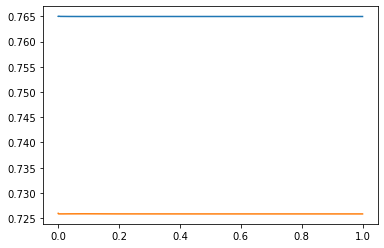

[0.725452196382429, 0.7254668780831572, 0.725452196382429, 0.7254668780831572, 0.725452196382429, 0.7254668780831571, 0.7254815597838853, 0.7254962414846136, 0.7254668780831571, 0.7254375146817007, 0.7254228329809724, 0.7254228329809724, 0.725452196382429, 0.725452196382429, 0.725452196382429]


In [66]:
"""
import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.logspace(-5,0,15), meanacc_dtrain_rr[1::2])

plt.plot(np.logspace(-5,0,15), meanacc_dtrain_rr[::2])
plt.show()

print(meanacc_dtest_rr[::2])
"""b

In [67]:
print("No NaNs accuracy:")
print("Test:",meanacc_dtest_rr[::2],"Data:", meanacc_dtrain_rr[::2])
print("\nCleaned NaNs accuracy:", )
print("Test:",meanacc_dtest_rr[1::2],"Data:", meanacc_dtrain_rr[1::2])

No NaNs error:
Test: [0.725452196382429, 0.7254668780831572, 0.725452196382429, 0.7254668780831572, 0.725452196382429, 0.7254668780831571, 0.7254815597838853, 0.7254962414846136, 0.7254668780831571, 0.7254375146817007, 0.7254228329809724, 0.7254228329809724, 0.725452196382429, 0.725452196382429, 0.725452196382429] Data: [0.7259317986062173, 0.7259220108057317, 0.7259220108057317, 0.7259269047059744, 0.725917116905489, 0.7259122230052463, 0.7258828596037898, 0.725843708401848, 0.7258437084018479, 0.725843708401848, 0.7258534962023334, 0.7258632840028189, 0.725843708401848, 0.7258388145016053, 0.7258388145016051]

Cleaned NaNs error:
Test: [0.7648281322161378, 0.7648281322161378, 0.7648226342064173, 0.7648226342064173, 0.7648226342064173, 0.7648171361966967, 0.7648171361966968, 0.7648171361966968, 0.7648061401772559, 0.7648061401772559, 0.7647896461480943, 0.7647786501286534, 0.7647951441578149, 0.7647896461480944, 0.7647896461480944] Data: [0.7650223952262614, 0.7650242278961682, 0.7650

# Logit

## Logistic Regression

In [7]:
meanacc_dtest_lr = []
meanacc_dtrain_lr = []

gamma = 0.0000000005

# Execute for data originally with no NaNs
dtmp_tr,dtmp_te=cross_validation(Y_no_nans,X_no_nans,k_fold=3,seed=1, function_name='logistic_regression', max_iters=10000,gamma=gamma)
meanacc_dtest_lr.append(dtmp_te)
meanacc_dtrain_lr.append(dtmp_tr)

# Execute for data originally with NaNs
dtmp_tr,dtmp_te=cross_validation(Y_cleaned,X_cleaned,k_fold=3,seed=1, function_name='logistic_regression', max_iters=10000,gamma=gamma)
meanacc_dtest_lr.append(dtmp_te)
meanacc_dtrain_lr.append(dtmp_tr)

Current iteration=0, loss=426371.94111903745
Current iteration=1, loss=304412.28049685917
Current iteration=2, loss=182517.70687172943
Current iteration=3, loss=75007.6071168799
Current iteration=4, loss=43018.768026563506
Current iteration=5, loss=40429.84931408414
Current iteration=6, loss=38828.43388929998
Current iteration=7, loss=37389.65898451601
Current iteration=8, loss=36117.05518427581
Current iteration=9, loss=35011.50945624462
Current iteration=10, loss=34069.1108166949
Current iteration=11, loss=33280.67184909558
Current iteration=12, loss=32631.947149979005
Current iteration=13, loss=32104.66628223557
Current iteration=14, loss=31678.268293028483
Current iteration=15, loss=31331.964252862
Current iteration=16, loss=31046.628370914168
Current iteration=17, loss=30806.095699402777
Current iteration=18, loss=30597.698511703184
Current iteration=19, loss=30412.141789082416
Current iteration=20, loss=30242.972376525762
Current iteration=21, loss=30085.903759645746
Current iter

Current iteration=190, loss=26131.819814974806
Current iteration=191, loss=26129.95312190246
Current iteration=192, loss=26128.105600168932
Current iteration=193, loss=26126.288284028367
Current iteration=194, loss=26124.49024848031
Current iteration=195, loss=26122.720206026122
Current iteration=196, loss=26120.96935284955
Current iteration=197, loss=26119.244498430595
Current iteration=198, loss=26117.53858166188
Current iteration=199, loss=26115.85686725894
Current iteration=200, loss=26114.193714756315
Current iteration=201, loss=26112.553146903152
Current iteration=202, loss=26110.930672845338
Current iteration=203, loss=26109.329326332394
Current iteration=204, loss=26107.745540413103
Current iteration=205, loss=26106.181568831846
Current iteration=206, loss=26104.634582415336
Current iteration=207, loss=26103.10622572301
Current iteration=208, loss=26101.59425529006
Current iteration=209, loss=26100.099844661054
Current iteration=210, loss=26098.621212910413
Current iteration=21

Current iteration=397, loss=25950.564822647637
Current iteration=398, loss=25950.12387126826
Current iteration=399, loss=25949.685009303168
Current iteration=400, loss=25949.248222827304
Current iteration=401, loss=25948.813498034135
Current iteration=402, loss=25948.380821234223
Current iteration=403, loss=25947.950178853855
Current iteration=404, loss=25947.52155743366
Current iteration=405, loss=25947.094943627362
Current iteration=406, loss=25946.67032420038
Current iteration=407, loss=25946.24768602856
Current iteration=408, loss=25945.827016096995
Current iteration=409, loss=25945.408301498668
Current iteration=410, loss=25944.991529433308
Current iteration=411, loss=25944.57668720617
Current iteration=412, loss=25944.16376222683
Current iteration=413, loss=25943.75274200808
Current iteration=414, loss=25943.343614164725
Current iteration=415, loss=25942.936366412498
Current iteration=416, loss=25942.530986566955
Current iteration=417, loss=25942.12746254235
Current iteration=418

Current iteration=594, loss=25891.61497753692
Current iteration=595, loss=25891.413342541968
Current iteration=596, loss=25891.21236731589
Current iteration=597, loss=25891.012048458982
Current iteration=598, loss=25890.81238259322
Current iteration=599, loss=25890.61336636213
Current iteration=600, loss=25890.414996430598
Current iteration=601, loss=25890.21726948477
Current iteration=602, loss=25890.020182231834
Current iteration=603, loss=25889.82373139992
Current iteration=604, loss=25889.627913737946
Current iteration=605, loss=25889.432726015442
Current iteration=606, loss=25889.23816502241
Current iteration=607, loss=25889.044227569208
Current iteration=608, loss=25888.850910486362
Current iteration=609, loss=25888.658210624446
Current iteration=610, loss=25888.46612485395
Current iteration=611, loss=25888.274650065105
Current iteration=612, loss=25888.08378316776
Current iteration=613, loss=25887.89352109126
Current iteration=614, loss=25887.703860784277
Current iteration=615, 

Current iteration=785, loss=25862.10256217727
Current iteration=786, loss=25861.983625340024
Current iteration=787, loss=25861.864964071945
Current iteration=788, loss=25861.746577276685
Current iteration=789, loss=25861.628463863864
Current iteration=790, loss=25861.510622749018
Current iteration=791, loss=25861.393052853553
Current iteration=792, loss=25861.27575310475
Current iteration=793, loss=25861.15872243567
Current iteration=794, loss=25861.041959785154
Current iteration=795, loss=25860.92546409779
Current iteration=796, loss=25860.809234323842
Current iteration=797, loss=25860.69326941926
Current iteration=798, loss=25860.5775683456
Current iteration=799, loss=25860.46213007003
Current iteration=800, loss=25860.346953565255
Current iteration=801, loss=25860.232037809514
Current iteration=802, loss=25860.117381786527
Current iteration=803, loss=25860.002984485473
Current iteration=804, loss=25859.888844900932
Current iteration=805, loss=25859.77496203289
Current iteration=806,

Current iteration=961, loss=25844.62254590183
Current iteration=962, loss=25844.539374588618
Current iteration=963, loss=25844.45635192615
Current iteration=964, loss=25844.373477460438
Current iteration=965, loss=25844.29075073955
Current iteration=966, loss=25844.2081713136
Current iteration=967, loss=25844.125738734772
Current iteration=968, loss=25844.04345255725
Current iteration=969, loss=25843.961312337273
Current iteration=970, loss=25843.879317633062
Current iteration=971, loss=25843.79746800485
Current iteration=972, loss=25843.71576301485
Current iteration=973, loss=25843.634202227266
Current iteration=974, loss=25843.552785208245
Current iteration=975, loss=25843.471511525902
Current iteration=976, loss=25843.39038075029
Current iteration=977, loss=25843.309392453404
Current iteration=978, loss=25843.228546209142
Current iteration=979, loss=25843.147841593323
Current iteration=980, loss=25843.06727818368
Current iteration=981, loss=25842.986855559804
Current iteration=982, 

Current iteration=1163, loss=25830.33877574255
Current iteration=1164, loss=25830.2785883027
Current iteration=1165, loss=25830.218487884118
Current iteration=1166, loss=25830.158474287444
Current iteration=1167, loss=25830.098547314043
Current iteration=1168, loss=25830.038706765987
Current iteration=1169, loss=25829.978952446076
Current iteration=1170, loss=25829.91928415779
Current iteration=1171, loss=25829.859701705336
Current iteration=1172, loss=25829.800204893596
Current iteration=1173, loss=25829.740793528166
Current iteration=1174, loss=25829.681467415336
Current iteration=1175, loss=25829.622226362066
Current iteration=1176, loss=25829.563070176024
Current iteration=1177, loss=25829.50399866554
Current iteration=1178, loss=25829.44501163965
Current iteration=1179, loss=25829.386108908035
Current iteration=1180, loss=25829.327290281075
Current iteration=1181, loss=25829.268555569804
Current iteration=1182, loss=25829.209904585936
Current iteration=1183, loss=25829.15133714183

Current iteration=1354, loss=25820.226686386166
Current iteration=1355, loss=25820.18016907546
Current iteration=1356, loss=25820.133710610848
Current iteration=1357, loss=25820.087310884304
Current iteration=1358, loss=25820.040969788126
Current iteration=1359, loss=25819.99468721489
Current iteration=1360, loss=25819.94846305751
Current iteration=1361, loss=25819.902297209173
Current iteration=1362, loss=25819.85618956339
Current iteration=1363, loss=25819.81014001395
Current iteration=1364, loss=25819.76414845496
Current iteration=1365, loss=25819.71821478082
Current iteration=1366, loss=25819.672338886226
Current iteration=1367, loss=25819.62652066617
Current iteration=1368, loss=25819.58076001593
Current iteration=1369, loss=25819.535056831097
Current iteration=1370, loss=25819.489411007537
Current iteration=1371, loss=25819.443822441415
Current iteration=1372, loss=25819.39829102919
Current iteration=1373, loss=25819.352816667582
Current iteration=1374, loss=25819.30739925365
Cur

Current iteration=1539, loss=25812.523039124786
Current iteration=1540, loss=25812.485838673376
Current iteration=1541, loss=25812.44868125787
Current iteration=1542, loss=25812.41156681093
Current iteration=1543, loss=25812.374495265394
Current iteration=1544, loss=25812.337466554243
Current iteration=1545, loss=25812.300480610622
Current iteration=1546, loss=25812.26353736781
Current iteration=1547, loss=25812.226636759253
Current iteration=1548, loss=25812.189778718537
Current iteration=1549, loss=25812.152963179415
Current iteration=1550, loss=25812.11619007578
Current iteration=1551, loss=25812.079459341672
Current iteration=1552, loss=25812.042770911285
Current iteration=1553, loss=25812.00612471897
Current iteration=1554, loss=25811.96952069922
Current iteration=1555, loss=25811.932958786667
Current iteration=1556, loss=25811.89643891611
Current iteration=1557, loss=25811.859961022466
Current iteration=1558, loss=25811.82352504084
Current iteration=1559, loss=25811.787130906447


Current iteration=1725, loss=25806.279782529895
Current iteration=1726, loss=25806.249569528758
Current iteration=1727, loss=25806.2193892379
Current iteration=1728, loss=25806.18924161167
Current iteration=1729, loss=25806.159126604492
Current iteration=1730, loss=25806.129044170884
Current iteration=1731, loss=25806.098994265445
Current iteration=1732, loss=25806.06897684287
Current iteration=1733, loss=25806.038991857928
Current iteration=1734, loss=25806.009039265482
Current iteration=1735, loss=25805.979119020467
Current iteration=1736, loss=25805.949231077928
Current iteration=1737, loss=25805.91937539297
Current iteration=1738, loss=25805.889551920787
Current iteration=1739, loss=25805.859760616684
Current iteration=1740, loss=25805.83000143601
Current iteration=1741, loss=25805.80027433423
Current iteration=1742, loss=25805.770579266864
Current iteration=1743, loss=25805.740916189552
Current iteration=1744, loss=25805.71128505798
Current iteration=1745, loss=25805.68168582795
C

Current iteration=1911, loss=25801.178572614124
Current iteration=1912, loss=25801.153739477875
Current iteration=1913, loss=25801.12893183462
Current iteration=1914, loss=25801.104149651463
Current iteration=1915, loss=25801.079392895565
Current iteration=1916, loss=25801.054661534134
Current iteration=1917, loss=25801.02995553444
Current iteration=1918, loss=25801.0052748638
Current iteration=1919, loss=25800.980619489594
Current iteration=1920, loss=25800.955989379243
Current iteration=1921, loss=25800.93138450022
Current iteration=1922, loss=25800.90680482007
Current iteration=1923, loss=25800.882250306367
Current iteration=1924, loss=25800.85772092675
Current iteration=1925, loss=25800.83321664892
Current iteration=1926, loss=25800.808737440602
Current iteration=1927, loss=25800.784283269604
Current iteration=1928, loss=25800.759854103773
Current iteration=1929, loss=25800.735449910997
Current iteration=1930, loss=25800.71107065925
Current iteration=1931, loss=25800.686716316508
C

Current iteration=2103, loss=25796.842566778323
Current iteration=2104, loss=25796.82208147372
Current iteration=2105, loss=25796.80161620634
Current iteration=2106, loss=25796.781170951705
Current iteration=2107, loss=25796.760745685384
Current iteration=2108, loss=25796.74034038297
Current iteration=2109, loss=25796.719955020108
Current iteration=2110, loss=25796.699589572454
Current iteration=2111, loss=25796.679244015722
Current iteration=2112, loss=25796.65891832565
Current iteration=2113, loss=25796.63861247801
Current iteration=2114, loss=25796.61832644861
Current iteration=2115, loss=25796.598060213306
Current iteration=2116, loss=25796.577813747972
Current iteration=2117, loss=25796.557587028517
Current iteration=2118, loss=25796.537380030903
Current iteration=2119, loss=25796.51719273111
Current iteration=2120, loss=25796.497025105153
Current iteration=2121, loss=25796.47687712909
Current iteration=2122, loss=25796.45674877901
Current iteration=2123, loss=25796.436640031032
C

Current iteration=2302, loss=25793.131180747627
Current iteration=2303, loss=25793.11424273367
Current iteration=2304, loss=25793.097320507964
Current iteration=2305, loss=25793.080414051932
Current iteration=2306, loss=25793.06352334706
Current iteration=2307, loss=25793.046648374828
Current iteration=2308, loss=25793.02978911676
Current iteration=2309, loss=25793.01294555438
Current iteration=2310, loss=25792.99611766926
Current iteration=2311, loss=25792.979305442983
Current iteration=2312, loss=25792.962508857163
Current iteration=2313, loss=25792.94572789344
Current iteration=2314, loss=25792.92896253347
Current iteration=2315, loss=25792.912212758947
Current iteration=2316, loss=25792.89547855157
Current iteration=2317, loss=25792.87875989308
Current iteration=2318, loss=25792.86205676523
Current iteration=2319, loss=25792.845369149807
Current iteration=2320, loss=25792.828697028614
Current iteration=2321, loss=25792.812040383487
Current iteration=2322, loss=25792.79539919627
Cur

Current iteration=2493, loss=25790.162530719288
Current iteration=2494, loss=25790.148297673677
Current iteration=2495, loss=25790.134077276678
Current iteration=2496, loss=25790.11986951381
Current iteration=2497, loss=25790.10567437057
Current iteration=2498, loss=25790.091491832507
Current iteration=2499, loss=25790.07732188516
Current iteration=2500, loss=25790.06316451412
Current iteration=2501, loss=25790.049019704962
Current iteration=2502, loss=25790.034887443297
Current iteration=2503, loss=25790.020767714755
Current iteration=2504, loss=25790.00666050498
Current iteration=2505, loss=25789.99256579963
Current iteration=2506, loss=25789.978483584386
Current iteration=2507, loss=25789.964413844937
Current iteration=2508, loss=25789.950356567017
Current iteration=2509, loss=25789.936311736346
Current iteration=2510, loss=25789.92227933868
Current iteration=2511, loss=25789.908259359792
Current iteration=2512, loss=25789.89425178546
Current iteration=2513, loss=25789.88025660149
C

Current iteration=2676, loss=25787.754732528418
Current iteration=2677, loss=25787.742589831167
Current iteration=2678, loss=25787.730457406775
Current iteration=2679, loss=25787.71833524367
Current iteration=2680, loss=25787.70622333029
Current iteration=2681, loss=25787.694121655077
Current iteration=2682, loss=25787.682030206506
Current iteration=2683, loss=25787.66994897305
Current iteration=2684, loss=25787.65787794321
Current iteration=2685, loss=25787.645817105487
Current iteration=2686, loss=25787.633766448405
Current iteration=2687, loss=25787.621725960496
Current iteration=2688, loss=25787.609695630308
Current iteration=2689, loss=25787.597675446406
Current iteration=2690, loss=25787.58566539737
Current iteration=2691, loss=25787.573665471784
Current iteration=2692, loss=25787.561675658253
Current iteration=2693, loss=25787.549695945396
Current iteration=2694, loss=25787.537726321843
Current iteration=2695, loss=25787.52576677624
Current iteration=2696, loss=25787.51381729724

Current iteration=2854, loss=25785.745001408763
Current iteration=2855, loss=25785.73451709835
Current iteration=2856, loss=25785.724041203775
Current iteration=2857, loss=25785.713573715697
Current iteration=2858, loss=25785.70311462474
Current iteration=2859, loss=25785.692663921578
Current iteration=2860, loss=25785.68222159687
Current iteration=2861, loss=25785.6717876413
Current iteration=2862, loss=25785.661362045554
Current iteration=2863, loss=25785.650944800338
Current iteration=2864, loss=25785.640535896364
Current iteration=2865, loss=25785.63013532435
Current iteration=2866, loss=25785.619743075033
Current iteration=2867, loss=25785.609359139162
Current iteration=2868, loss=25785.598983507487
Current iteration=2869, loss=25785.588616170782
Current iteration=2870, loss=25785.57825711981
Current iteration=2871, loss=25785.567906345375
Current iteration=2872, loss=25785.55756383827
Current iteration=2873, loss=25785.547229589298
Current iteration=2874, loss=25785.536903589295


Current iteration=3048, loss=25783.85797828452
Current iteration=3049, loss=25783.848963749788
Current iteration=3050, loss=25783.839956004285
Current iteration=3051, loss=25783.830955040532
Current iteration=3052, loss=25783.821960851063
Current iteration=3053, loss=25783.812973428423
Current iteration=3054, loss=25783.803992765173
Current iteration=3055, loss=25783.795018853863
Current iteration=3056, loss=25783.78605168708
Current iteration=3057, loss=25783.777091257387
Current iteration=3058, loss=25783.76813755737
Current iteration=3059, loss=25783.759190579643
Current iteration=3060, loss=25783.75025031679
Current iteration=3061, loss=25783.741316761436
Current iteration=3062, loss=25783.732389906196
Current iteration=3063, loss=25783.7234697437
Current iteration=3064, loss=25783.714556266594
Current iteration=3065, loss=25783.70564946752
Current iteration=3066, loss=25783.69674933913
Current iteration=3067, loss=25783.68785587409
Current iteration=3068, loss=25783.678969065077
C

Current iteration=3238, loss=25782.25914150463
Current iteration=3239, loss=25782.251291895085
Current iteration=3240, loss=25782.24344779813
Current iteration=3241, loss=25782.23560920776
Current iteration=3242, loss=25782.227776117972
Current iteration=3243, loss=25782.21994852275
Current iteration=3244, loss=25782.212126416107
Current iteration=3245, loss=25782.20430979206
Current iteration=3246, loss=25782.19649864463
Current iteration=3247, loss=25782.188692967837
Current iteration=3248, loss=25782.180892755714
Current iteration=3249, loss=25782.173098002313
Current iteration=3250, loss=25782.165308701664
Current iteration=3251, loss=25782.15752484783
Current iteration=3252, loss=25782.14974643488
Current iteration=3253, loss=25782.141973456866
Current iteration=3254, loss=25782.134205907867
Current iteration=3255, loss=25782.12644378196
Current iteration=3256, loss=25782.11868707324
Current iteration=3257, loss=25782.110935775803
Current iteration=3258, loss=25782.103189883743
Cu

Current iteration=3434, loss=25780.81892032455
Current iteration=3435, loss=25780.812044218546
Current iteration=3436, loss=25780.805172567205
Current iteration=3437, loss=25780.798305365715
Current iteration=3438, loss=25780.791442609247
Current iteration=3439, loss=25780.78458429301
Current iteration=3440, loss=25780.777730412196
Current iteration=3441, loss=25780.77088096199
Current iteration=3442, loss=25780.76403593761
Current iteration=3443, loss=25780.75719533427
Current iteration=3444, loss=25780.750359147172
Current iteration=3445, loss=25780.743527371556
Current iteration=3446, loss=25780.73670000263
Current iteration=3447, loss=25780.729877035646
Current iteration=3448, loss=25780.723058465825
Current iteration=3449, loss=25780.716244288422
Current iteration=3450, loss=25780.70943449868
Current iteration=3451, loss=25780.702629091855
Current iteration=3452, loss=25780.69582806321
Current iteration=3453, loss=25780.689031408
Current iteration=3454, loss=25780.6822391215
Curre

Current iteration=3625, loss=25779.58118095659
Current iteration=3626, loss=25779.57507406608
Current iteration=3627, loss=25779.56897080064
Current iteration=3628, loss=25779.562871156373
Current iteration=3629, loss=25779.55677512939
Current iteration=3630, loss=25779.5506827158
Current iteration=3631, loss=25779.544593911716
Current iteration=3632, loss=25779.53850871327
Current iteration=3633, loss=25779.53242711659
Current iteration=3634, loss=25779.5263491178
Current iteration=3635, loss=25779.52027471303
Current iteration=3636, loss=25779.514203898438
Current iteration=3637, loss=25779.508136670152
Current iteration=3638, loss=25779.502073024316
Current iteration=3639, loss=25779.496012957097
Current iteration=3640, loss=25779.489956464644
Current iteration=3641, loss=25779.483903543118
Current iteration=3642, loss=25779.477854188677
Current iteration=3643, loss=25779.471808397502
Current iteration=3644, loss=25779.46576616577
Current iteration=3645, loss=25779.459727489633
Curr

Current iteration=3823, loss=25778.438010385296
Current iteration=3824, loss=25778.43255050948
Current iteration=3825, loss=25778.427093565893
Current iteration=3826, loss=25778.421639551427
Current iteration=3827, loss=25778.416188462925
Current iteration=3828, loss=25778.4107402973
Current iteration=3829, loss=25778.40529505141
Current iteration=3830, loss=25778.39985272215
Current iteration=3831, loss=25778.394413306403
Current iteration=3832, loss=25778.38897680107
Current iteration=3833, loss=25778.383543203043
Current iteration=3834, loss=25778.378112509217
Current iteration=3835, loss=25778.372684716505
Current iteration=3836, loss=25778.367259821804
Current iteration=3837, loss=25778.36183782202
Current iteration=3838, loss=25778.356418714076
Current iteration=3839, loss=25778.351002494885
Current iteration=3840, loss=25778.345589161374
Current iteration=3841, loss=25778.340178710445
Current iteration=3842, loss=25778.334771139045
Current iteration=3843, loss=25778.329366444097

Current iteration=4012, loss=25777.454894087496
Current iteration=4013, loss=25777.449936453897
Current iteration=4014, loss=25777.444981218447
Current iteration=4015, loss=25777.44002837862
Current iteration=4016, loss=25777.43507793187
Current iteration=4017, loss=25777.43012987567
Current iteration=4018, loss=25777.425184207474
Current iteration=4019, loss=25777.42024092476
Current iteration=4020, loss=25777.415300024993
Current iteration=4021, loss=25777.410361505663
Current iteration=4022, loss=25777.40542536423
Current iteration=4023, loss=25777.400491598193
Current iteration=4024, loss=25777.395560205023
Current iteration=4025, loss=25777.390631182214
Current iteration=4026, loss=25777.38570452725
Current iteration=4027, loss=25777.380780237625
Current iteration=4028, loss=25777.37585831083
Current iteration=4029, loss=25777.37093874437
Current iteration=4030, loss=25777.36602153574
Current iteration=4031, loss=25777.36110668245
Current iteration=4032, loss=25777.356194181986
Cu

Current iteration=4209, loss=25776.521512515523
Current iteration=4210, loss=25776.516981569526
Current iteration=4211, loss=25776.512452571096
Current iteration=4212, loss=25776.507925518177
Current iteration=4213, loss=25776.503400408736
Current iteration=4214, loss=25776.4988772407
Current iteration=4215, loss=25776.494356012066
Current iteration=4216, loss=25776.48983672076
Current iteration=4217, loss=25776.485319364765
Current iteration=4218, loss=25776.48080394204
Current iteration=4219, loss=25776.476290450537
Current iteration=4220, loss=25776.47177888824
Current iteration=4221, loss=25776.46726925312
Current iteration=4222, loss=25776.462761543156
Current iteration=4223, loss=25776.458255756304
Current iteration=4224, loss=25776.45375189055
Current iteration=4225, loss=25776.44924994388
Current iteration=4226, loss=25776.444749914277
Current iteration=4227, loss=25776.440251799708
Current iteration=4228, loss=25776.435755598184
Current iteration=4229, loss=25776.43126130767
C

Current iteration=4395, loss=25775.710205688963
Current iteration=4396, loss=25775.706003975683
Current iteration=4397, loss=25775.70180386474
Current iteration=4398, loss=25775.697605354464
Current iteration=4399, loss=25775.693408443178
Current iteration=4400, loss=25775.68921312921
Current iteration=4401, loss=25775.685019410903
Current iteration=4402, loss=25775.680827286575
Current iteration=4403, loss=25775.67663675457
Current iteration=4404, loss=25775.672447813227
Current iteration=4405, loss=25775.668260460872
Current iteration=4406, loss=25775.664074695866
Current iteration=4407, loss=25775.659890516523
Current iteration=4408, loss=25775.655707921218
Current iteration=4409, loss=25775.651526908274
Current iteration=4410, loss=25775.64734747605
Current iteration=4411, loss=25775.64316962289
Current iteration=4412, loss=25775.63899334715
Current iteration=4413, loss=25775.63481864718
Current iteration=4414, loss=25775.63064552133
Current iteration=4415, loss=25775.62647396797
C

Current iteration=4588, loss=25774.92708590956
Current iteration=4589, loss=25774.923164461794
Current iteration=4590, loss=25774.91924432462
Current iteration=4591, loss=25774.915325496688
Current iteration=4592, loss=25774.911407976622
Current iteration=4593, loss=25774.907491763086
Current iteration=4594, loss=25774.903576854704
Current iteration=4595, loss=25774.89966325014
Current iteration=4596, loss=25774.89575094804
Current iteration=4597, loss=25774.891839947057
Current iteration=4598, loss=25774.887930245834
Current iteration=4599, loss=25774.88402184302
Current iteration=4600, loss=25774.880114737287
Current iteration=4601, loss=25774.87620892727
Current iteration=4602, loss=25774.872304411645
Current iteration=4603, loss=25774.868401189055
Current iteration=4604, loss=25774.86449925817
Current iteration=4605, loss=25774.860598617648
Current iteration=4606, loss=25774.85669926615
Current iteration=4607, loss=25774.852801202345
Current iteration=4608, loss=25774.848904424893


Current iteration=4943, loss=25773.608159915384
Current iteration=4944, loss=25773.60462819867
Current iteration=4945, loss=25773.60109739133
Current iteration=4946, loss=25773.597567492412
Current iteration=4947, loss=25773.594038501007
Current iteration=4948, loss=25773.590510416187
Current iteration=4949, loss=25773.586983237015
Current iteration=4950, loss=25773.583456962584
Current iteration=4951, loss=25773.579931591954
Current iteration=4952, loss=25773.576407124216
Current iteration=4953, loss=25773.572883558434
Current iteration=4954, loss=25773.5693608937
Current iteration=4955, loss=25773.565839129093
Current iteration=4956, loss=25773.56231826369
Current iteration=4957, loss=25773.558798296574
Current iteration=4958, loss=25773.55527922683
Current iteration=4959, loss=25773.551761053546
Current iteration=4960, loss=25773.548243775796
Current iteration=4961, loss=25773.54472739268
Current iteration=4962, loss=25773.54121190328
Current iteration=4963, loss=25773.537697306685


Current iteration=5123, loss=25772.986253760297
Current iteration=5124, loss=25772.982871676984
Current iteration=5125, loss=25772.979490350925
Current iteration=5126, loss=25772.976109781346
Current iteration=5127, loss=25772.972729967474
Current iteration=5128, loss=25772.969350908563
Current iteration=5129, loss=25772.96597260383
Current iteration=5130, loss=25772.962595052522
Current iteration=5131, loss=25772.95921825388
Current iteration=5132, loss=25772.955842207135
Current iteration=5133, loss=25772.95246691153
Current iteration=5134, loss=25772.949092366303
Current iteration=5135, loss=25772.9457185707
Current iteration=5136, loss=25772.942345523963
Current iteration=5137, loss=25772.938973225322
Current iteration=5138, loss=25772.935601674035
Current iteration=5139, loss=25772.932230869334
Current iteration=5140, loss=25772.928860810483
Current iteration=5141, loss=25772.925491496713
Current iteration=5142, loss=25772.922122927263
Current iteration=5143, loss=25772.9187551014

Current iteration=5320, loss=25772.33368875904
Current iteration=5321, loss=25772.33044203059
Current iteration=5322, loss=25772.327195923113
Current iteration=5323, loss=25772.32395043598
Current iteration=5324, loss=25772.320705568578
Current iteration=5325, loss=25772.31746132027
Current iteration=5326, loss=25772.314217690455
Current iteration=5327, loss=25772.310974678498
Current iteration=5328, loss=25772.307732283793
Current iteration=5329, loss=25772.304490505714
Current iteration=5330, loss=25772.301249343647
Current iteration=5331, loss=25772.298008796977
Current iteration=5332, loss=25772.294768865082
Current iteration=5333, loss=25772.291529547358
Current iteration=5334, loss=25772.28829084318
Current iteration=5335, loss=25772.28505275194
Current iteration=5336, loss=25772.281815273018
Current iteration=5337, loss=25772.27857840581
Current iteration=5338, loss=25772.275342149704
Current iteration=5339, loss=25772.27210650408
Current iteration=5340, loss=25772.268871468328


Current iteration=5517, loss=25771.705329887947
Current iteration=5518, loss=25771.702194271198
Current iteration=5519, loss=25771.699059164785
Current iteration=5520, loss=25771.695924568212
Current iteration=5521, loss=25771.69279048097
Current iteration=5522, loss=25771.68965690256
Current iteration=5523, loss=25771.686523832468
Current iteration=5524, loss=25771.68339127021
Current iteration=5525, loss=25771.680259215267
Current iteration=5526, loss=25771.67712766714
Current iteration=5527, loss=25771.673996625334
Current iteration=5528, loss=25771.670866089342
Current iteration=5529, loss=25771.667736058665
Current iteration=5530, loss=25771.66460653281
Current iteration=5531, loss=25771.661477511272
Current iteration=5532, loss=25771.65834899355
Current iteration=5533, loss=25771.65522097915
Current iteration=5534, loss=25771.652093467575
Current iteration=5535, loss=25771.648966458324
Current iteration=5536, loss=25771.645839950907
Current iteration=5537, loss=25771.642713944828

Current iteration=5712, loss=25771.10295313011
Current iteration=5713, loss=25771.099908094217
Current iteration=5714, loss=25771.0968634796
Current iteration=5715, loss=25771.09381928585
Current iteration=5716, loss=25771.090775512548
Current iteration=5717, loss=25771.087732159296
Current iteration=5718, loss=25771.084689225674
Current iteration=5719, loss=25771.08164671127
Current iteration=5720, loss=25771.07860461569
Current iteration=5721, loss=25771.075562938517
Current iteration=5722, loss=25771.07252167934
Current iteration=5723, loss=25771.06948083775
Current iteration=5724, loss=25771.06644041334
Current iteration=5725, loss=25771.063400405706
Current iteration=5726, loss=25771.060360814445
Current iteration=5727, loss=25771.05732163915
Current iteration=5728, loss=25771.054282879402
Current iteration=5729, loss=25771.05124453481
Current iteration=5730, loss=25771.048206604966
Current iteration=5731, loss=25771.045169089462
Current iteration=5732, loss=25771.042131987895
Cur

Current iteration=5911, loss=25770.504784623154
Current iteration=5912, loss=25770.50181584703
Current iteration=5913, loss=25770.498847418257
Current iteration=5914, loss=25770.49587933649
Current iteration=5915, loss=25770.4929116014
Current iteration=5916, loss=25770.489944212663
Current iteration=5917, loss=25770.48697716993
Current iteration=5918, loss=25770.48401047288
Current iteration=5919, loss=25770.481044121174
Current iteration=5920, loss=25770.47807811449
Current iteration=5921, loss=25770.47511245248
Current iteration=5922, loss=25770.472147134828
Current iteration=5923, loss=25770.469182161196
Current iteration=5924, loss=25770.46621753125
Current iteration=5925, loss=25770.463253244674
Current iteration=5926, loss=25770.460289301118
Current iteration=5927, loss=25770.45732570027
Current iteration=5928, loss=25770.45436244179
Current iteration=5929, loss=25770.451399525355
Current iteration=5930, loss=25770.44843695063
Current iteration=5931, loss=25770.4454747173
Curren

Current iteration=6106, loss=25769.93205641469
Current iteration=6107, loss=25769.92914945614
Current iteration=6108, loss=25769.926242785954
Current iteration=6109, loss=25769.923336403877
Current iteration=6110, loss=25769.920430309623
Current iteration=6111, loss=25769.917524502933
Current iteration=6112, loss=25769.914618983516
Current iteration=6113, loss=25769.911713751124
Current iteration=6114, loss=25769.908808805463
Current iteration=6115, loss=25769.905904146275
Current iteration=6116, loss=25769.90299977329
Current iteration=6117, loss=25769.900095686233
Current iteration=6118, loss=25769.897191884833
Current iteration=6119, loss=25769.894288368825
Current iteration=6120, loss=25769.891385137937
Current iteration=6121, loss=25769.8884821919
Current iteration=6122, loss=25769.885579530448
Current iteration=6123, loss=25769.8826771533
Current iteration=6124, loss=25769.879775060203
Current iteration=6125, loss=25769.876873250883
Current iteration=6126, loss=25769.873971725065

Current iteration=6306, loss=25769.356062831404
Current iteration=6307, loss=25769.353208475313
Current iteration=6308, loss=25769.350354358336
Current iteration=6309, loss=25769.34750048024
Current iteration=6310, loss=25769.34464684081
Current iteration=6311, loss=25769.341793439824
Current iteration=6312, loss=25769.338940277055
Current iteration=6313, loss=25769.336087352287
Current iteration=6314, loss=25769.3332346653
Current iteration=6315, loss=25769.330382215885
Current iteration=6316, loss=25769.327530003797
Current iteration=6317, loss=25769.324678028832
Current iteration=6318, loss=25769.32182629077
Current iteration=6319, loss=25769.318974789392
Current iteration=6320, loss=25769.31612352447
Current iteration=6321, loss=25769.3132724958
Current iteration=6322, loss=25769.310421703154
Current iteration=6323, loss=25769.307571146306
Current iteration=6324, loss=25769.304720825054
Current iteration=6325, loss=25769.301870739175
Current iteration=6326, loss=25769.299020888444


Current iteration=6502, loss=25768.800917665027
Current iteration=6503, loss=25768.79810620866
Current iteration=6504, loss=25768.795294952062
Current iteration=6505, loss=25768.792483895064
Current iteration=6506, loss=25768.789673037463
Current iteration=6507, loss=25768.786862379093
Current iteration=6508, loss=25768.78405191977
Current iteration=6509, loss=25768.78124165932
Current iteration=6510, loss=25768.778431597548
Current iteration=6511, loss=25768.77562173428
Current iteration=6512, loss=25768.77281206935
Current iteration=6513, loss=25768.77000260256
Current iteration=6514, loss=25768.76719333374
Current iteration=6515, loss=25768.764384262715
Current iteration=6516, loss=25768.761575389293
Current iteration=6517, loss=25768.7587667133
Current iteration=6518, loss=25768.75595823457
Current iteration=6519, loss=25768.753149952907
Current iteration=6520, loss=25768.750341868144
Current iteration=6521, loss=25768.747533980095
Current iteration=6522, loss=25768.74472628859
Cur

Current iteration=6698, loss=25768.253476809583
Current iteration=6699, loss=25768.250701268033
Current iteration=6700, loss=25768.24792589412
Current iteration=6701, loss=25768.245150687675
Current iteration=6702, loss=25768.24237564856
Current iteration=6703, loss=25768.239600776615
Current iteration=6704, loss=25768.23682607171
Current iteration=6705, loss=25768.23405153368
Current iteration=6706, loss=25768.23127716239
Current iteration=6707, loss=25768.22850295769
Current iteration=6708, loss=25768.225728919428
Current iteration=6709, loss=25768.222955047462
Current iteration=6710, loss=25768.220181341647
Current iteration=6711, loss=25768.217407801832
Current iteration=6712, loss=25768.214634427874
Current iteration=6713, loss=25768.211861219625
Current iteration=6714, loss=25768.20908817694
Current iteration=6715, loss=25768.20631529967
Current iteration=6716, loss=25768.20354258767
Current iteration=6717, loss=25768.2007700408
Current iteration=6718, loss=25768.197997658906
Cur

Current iteration=6877, loss=25767.759192189133
Current iteration=6878, loss=25767.756444430186
Current iteration=6879, loss=25767.75369681464
Current iteration=6880, loss=25767.750949342382
Current iteration=6881, loss=25767.74820201327
Current iteration=6882, loss=25767.745454827196
Current iteration=6883, loss=25767.742707784026
Current iteration=6884, loss=25767.739960883646
Current iteration=6885, loss=25767.73721412593
Current iteration=6886, loss=25767.73446751075
Current iteration=6887, loss=25767.731721037995
Current iteration=6888, loss=25767.72897470753
Current iteration=6889, loss=25767.72622851924
Current iteration=6890, loss=25767.723482473015
Current iteration=6891, loss=25767.720736568706
Current iteration=6892, loss=25767.717990806217
Current iteration=6893, loss=25767.71524518541
Current iteration=6894, loss=25767.712499706166
Current iteration=6895, loss=25767.70975436837
Current iteration=6896, loss=25767.7070091719
Current iteration=6897, loss=25767.70426411663
Cur

Current iteration=7057, loss=25767.266793093077
Current iteration=7058, loss=25767.264069275618
Current iteration=7059, loss=25767.261345581283
Current iteration=7060, loss=25767.258622009955
Current iteration=7061, loss=25767.25589856155
Current iteration=7062, loss=25767.253175235957
Current iteration=7063, loss=25767.25045203308
Current iteration=7064, loss=25767.24772895281
Current iteration=7065, loss=25767.24500599505
Current iteration=7066, loss=25767.242283159692
Current iteration=7067, loss=25767.239560446636
Current iteration=7068, loss=25767.23683785578
Current iteration=7069, loss=25767.23411538703
Current iteration=7070, loss=25767.231393040274
Current iteration=7071, loss=25767.228670815413
Current iteration=7072, loss=25767.225948712356
Current iteration=7073, loss=25767.223226730985
Current iteration=7074, loss=25767.22050487121
Current iteration=7075, loss=25767.217783132925
Current iteration=7076, loss=25767.215061516035
Current iteration=7077, loss=25767.212340020433

KeyboardInterrupt: 

In [22]:
print("No NaNs accuracy:")
print("Test:",meanacc_dtest_lr[0],"Data:", meanacc_dtrain_lr[0])
print("\nCleaned NaNs accuracy:", )
print("Test:",meanacc_dtest_lr[1],"Data:", meanacc_dtrain_lr[1])

No NaNs accuracy:
Test: 0.6844608879492601 Data: 0.6841599130843316

Cleaned NaNs accuracy:
Test: 0.7420058938664204 Data: 0.7420361329198829


## Reg Logistic Regression

In [1]:
meanacc_dtest_rlr = []
meanacc_dtrain_rlr = []

gamma = 0.0000000005

for lambda_ in np.logspace(-5,0,15):
    # Execute for data originally with no NaNs
    dtmp_tr,dtmp_te=cross_validation(Y_no_nans,X_no_nans,k_fold=3,seed=1, function_name='reg_logistic_regression', max_iters=10000,gamma=gamma,lambda_=lambda_)
    meanacc_dtest_rlr.append(dtmp_te)
    meanacc_dtrain_rlr.append(dtmp_tr)

    # Execute for data originally with NaNs
    dtmp_tr,dtmp_te=cross_validation(Y_cleaned,X_cleaned,k_fold=3,seed=1, function_name='reg_logistic_regression', max_iters=10000,gamma=gamma,lambda_=lambda_)
    meanacc_dtest_rlr.append(dtmp_te)
    meanacc_dtrain_rlr.append(dtmp_tr)

NameError: name 'np' is not defined

Too slow! Find good lambda before running.

TODO:

Try with polynomial expansion and standardization